<a href="https://colab.research.google.com/github/madhurapi/Recommender-System/blob/main/Movie_Recommendations_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings

In [ ]:
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
movie_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender System/movies.csv')

In [ ]:
rating_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender System/ratings.csv')

In [ ]:
movie_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
rating_df.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [ ]:
# Now combine the two tables and drop things we dont have to use

In [ ]:
combine_movie_rating = pd.merge(rating_df, movie_df, on='movieId')
combine_movie_rating.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
5,31,16,4.0,832397760,Casino (1995),Crime|Drama
6,47,16,4.0,853361808,Casino (1995),Crime|Drama
7,60,16,4.0,1162941904,Casino (1995),Crime|Drama
8,62,16,4.5,1267576909,Casino (1995),Crime|Drama
9,88,16,3.5,1180879072,Casino (1995),Crime|Drama


In [ ]:
combine_movie_rating.drop(['timestamp'], axis=1, inplace=True)

In [ ]:
combine_movie_rating.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama


In [ ]:
# Assigning a unique value to each user and movie in range 0,no_of_users and 0,no_of_movies and 0, no_of_genres respectively.
combine_movie_rating1 = combine_movie_rating.copy()
combine_movie_rating1.userId = combine_movie_rating1.userId.astype('category').cat.codes.values
combine_movie_rating1.movieId = combine_movie_rating1.movieId.astype('category').cat.codes.values
combine_movie_rating1.genres = combine_movie_rating1.genres.astype('category').cat.codes.values
train, test = train_test_split(combine_movie_rating1, test_size=0.2)

In [ ]:
train.head()

,userId,movieId,rating,title,genres
44242,309,5896,2.5,Ocean's Twelve (2004),176
47221,559,4997,5.0,School of Rock (2003),687
94401,606,3097,4.0,"Invisible Man, The (1933)",900
614,259,47,3.0,"Usual Suspects, The (1995)",760
33109,417,4680,2.0,X2: X-Men United (2003),118


In [ ]:
test.head()

,userId,movieId,rating,title,genres
39104,454,528,3.0,Pinocchio (1940),520
30311,121,1143,5.0,Scream (1996),681
11053,302,2281,4.0,American Beauty (1999),843
24480,509,2233,3.5,Airplane II: The Sequel (1982),600
82321,166,7812,4.5,Vicky Cristina Barcelona (2008),650


In [ ]:
print('train: ',train.shape)
print('test: ',test.shape)

train:  (84271, 5)
test:  (21068, 5)


In [ ]:
n_users, n_movies, n_genres = len(combine_movie_rating1.userId.unique()), len(combine_movie_rating1.movieId.unique()), len(combine_movie_rating1.genres.unique())

In [ ]:
import tensorflow as tf

In [ ]:
%pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import pickle
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import math 
import itertools
# from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Embedding, Input, dot, concatenate
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.neighbors import NearestNeighbors
from keras.utils import to_categorical
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
def matrix_factorisation_model_with_n_latent_factors(n_latent_factors, opt) :
  movie_input = keras.layers.Input(shape=(1,),name='Item',dtype='int64')
  movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
  movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

  user_input = keras.layers.Input(shape=(1,),name='User',dtype='int64')
  user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
  user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
  
  prod = dot([movie_vec, user_vec],name='DotProduct', axes = 1)

  model = keras.Model([user_input, movie_input], prod)
  model.compile(optimizer = opt , loss = 'mean_squared_error')

  return model

In [ ]:
import keras
batch_size=128
epochs=30
TESTUSER = 200
n_latent_factors = 10
optimizer = Adam()
model = matrix_factorisation_model_with_n_latent_factors(n_latent_factors, optimizer)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Item (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 10)        103260      ['Item[0][0]']                   
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 10)        6690        ['User[0][0]']                   
                                                                                              

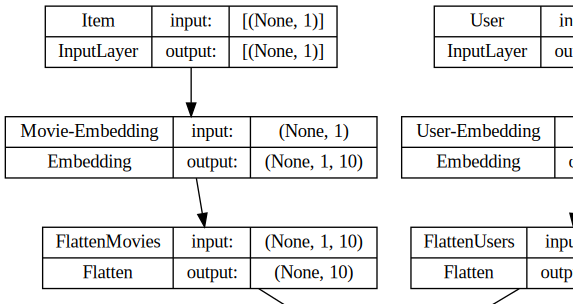

In [ ]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
model.summary()
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
train.head()

,userId,movieId,rating,title,genres
44242,309,5896,2.5,Ocean's Twelve (2004),176
47221,559,4997,5.0,School of Rock (2003),687
94401,606,3097,4.0,"Invisible Man, The (1933)",900
614,259,47,3.0,"Usual Suspects, The (1995)",760
33109,417,4680,2.0,X2: X-Men United (2003),118


In [ ]:
from IPython.display import clear_output

callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('bestweights.h5', save_best_only=True)]

History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([test.userId,test.movieId],test.rating),
                              verbose = 1, callbacks=callbacks)

Epoch 1/30
659/659 [==============================] - 3s 4ms/step - loss: 13.1250 - val_loss: 11.5969
Epoch 2/30
659/659 [==============================] - 3s 4ms/step - loss: 7.6005 - val_loss: 4.8073
Epoch 3/30
659/659 [==============================] - 3s 5ms/step - loss: 3.4058 - val_loss: 2.9270
Epoch 4/30
659/659 [==============================] - 5s 7ms/step - loss: 2.1710 - val_loss: 2.1893
Epoch 5/30
659/659 [==============================] - 5s 8ms/step - loss: 1.6072 - val_loss: 1.8056
Epoch 6/30
659/659 [==============================] - 4s 6ms/step - loss: 1.2941 - val_loss: 1.5817
Epoch 7/30
659/659 [==============================] - 4s 6ms/step - loss: 1.1004 - val_loss: 1.4381
Epoch 8/30
659/659 [==============================] - 5s 7ms/step - loss: 0.9727 - val_loss: 1.3445
Epoch 9/30
659/659 [==============================] - 4s 7ms/step - loss: 0.8844 - val_loss: 1.2786
Epoch 10/30
659/659 [==============================] - 4s 6ms/step - loss: 0.8214 - val_loss: 1.23

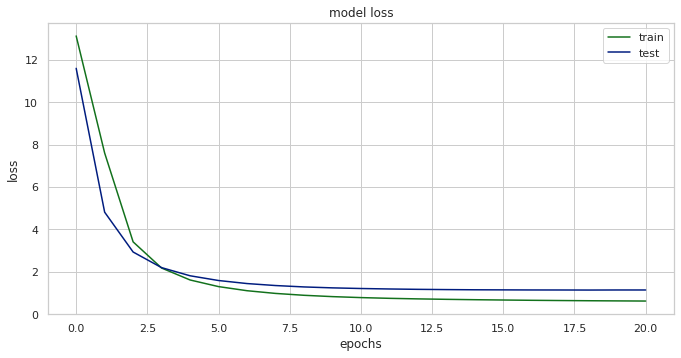

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 19 = 1.0637


In [ ]:
def matrix_factorisation_model_with_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_movie) :
  
  movie_input = keras.layers.Input(shape=[1],name='Item')
  movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
  movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
  movie_vec = keras.layers.Dropout(0.2)(movie_vec)


  user_input = keras.layers.Input(shape=[1],name='User')
  user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
  user_vec = keras.layers.Dropout(0.2)(user_vec)


  concat = dot([movie_vec, user_vec], name='dot', axes=1)
  concat_dropout = keras.layers.Dropout(0.2)(concat)
  dense = keras.layers.Dense(100,name='FullyConnected')(concat)
  dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
  dense_2 = keras.layers.Dense(50,name='FullyConnected-1')(concat)
  dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
  dense_3 = keras.layers.Dense(20,name='FullyConnected-2')(dense_2)
  dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
  dense_4 = keras.layers.Dense(10,name='FullyConnected-3', activation='relu')(dense_3)


  result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
  adam = Adam(lr=0.005)
  model = keras.Model([user_input, movie_input], result)
  model.compile(optimizer=adam,loss= 'mean_absolute_error')
  return model

In [ ]:
# batch_size=128
epochs=15
# TESTUSER = 200
n_latent_factors_user=5
n_latent_factors_movie=5
model = matrix_factorisation_model_with_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_movie)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Item (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 5)         51630       ['Item[0][0]']                   
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         3345        ['User[0][0]']                   
                                                                                            

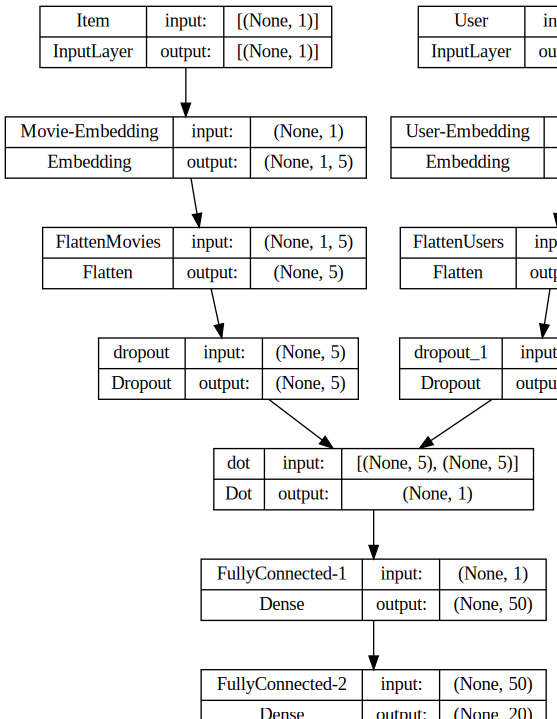

In [ ]:
model.summary()
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('bestweightsdeeper.h5', save_best_only=True)]

History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([test.userId,test.movieId],test.rating),
                              verbose = 1, callbacks=callbacks)

Epoch 1/15
659/659 [==============================] - 7s 8ms/step - loss: 0.8954 - val_loss: 0.8311
Epoch 2/15
659/659 [==============================] - 6s 9ms/step - loss: 0.8390 - val_loss: 0.8076
Epoch 3/15
659/659 [==============================] - 6s 9ms/step - loss: 0.7602 - val_loss: 0.7355
Epoch 4/15
659/659 [==============================] - 4s 7ms/step - loss: 0.6927 - val_loss: 0.7165
Epoch 5/15
659/659 [==============================] - 6s 9ms/step - loss: 0.6661 - val_loss: 0.7077
Epoch 6/15
659/659 [==============================] - 4s 7ms/step - loss: 0.6490 - val_loss: 0.6986
Epoch 7/15
659/659 [==============================] - 5s 7ms/step - loss: 0.6398 - val_loss: 0.6949
Epoch 8/15
659/659 [==============================] - 4s 6ms/step - loss: 0.6315 - val_loss: 0.6940
Epoch 9/15
659/659 [==============================] - 2s 3ms/step - loss: 0.6263 - val_loss: 0.6927
Epoch 10/15
659/659 [==============================] - 2s 3ms/step - loss: 0.6205 - val_loss: 0.6981

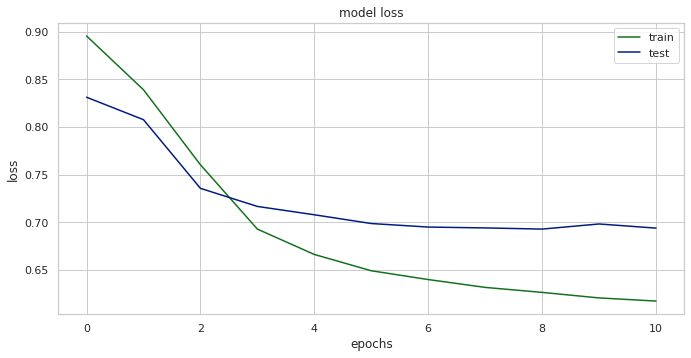

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 9 = 0.8323


In [ ]:
from keras import layers 
def matrix_factorisation_model_with_genres_and_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_movie, n_latent_factors_genre) :
  
  genre_input = keras.layers.Input(shape=[1],name='genre')
  genre_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_genre, name='genre-Embedding')(genre_input)
  genre_vec = keras.layers.Flatten(name='Flattengenre')(genre_embedding)
  genre_vec = keras.layers.Dropout(0.2)(genre_vec)
  
  
  movie_input = keras.layers.Input(shape=[1],name='Item')
  movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
  movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
  movie_vec = keras.layers.Dropout(0.2)(movie_vec)


  user_input = keras.layers.Input(shape=[1],name='User')
  user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
  user_vec = keras.layers.Dropout(0.2)(user_vec)

  concat = layers.concatenate([genre_vec, user_vec, movie_vec], axis=1)
#   concat = dot([movie_vec, user_vec, genre_vec], name='dot', axes=1)
  concat_dropout = keras.layers.Dropout(0.2)(concat)
  dense = keras.layers.Dense(100,name='FullyConnected')(concat)
  dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
  dense_2 = keras.layers.Dense(50,name='FullyConnected-1')(concat)
  dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
  dense_3 = keras.layers.Dense(20,name='FullyConnected-2')(dense_2)
  dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
  dense_4 = keras.layers.Dense(10,name='FullyConnected-3', activation='relu')(dense_3)


  result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
  adam = Adam(lr=0.005)
  model = keras.Model([user_input, movie_input, genre_input], result)
  model.compile(optimizer=adam,loss= 'mean_absolute_error')
  return model

In [ ]:
batch_size=128
epochs=10
TESTUSER = 200
n_latent_factors_user=5
n_latent_factors_movie=5
n_latent_factors_genre=3
model = matrix_factorisation_model_with_genres_and_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_movie, n_latent_factors_genre)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Item (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre-Embedding (Embedding)    (None, 1, 3)         30978       ['genre[0][0]']                  
                                                                                            

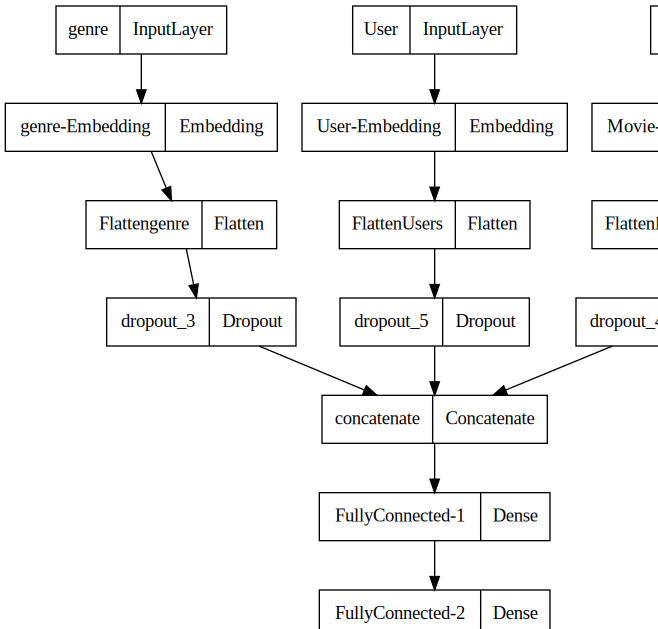

In [ ]:
model.summary()
SVG(model_to_dot( model, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
callbacks = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint('bestweightsdeeper&genre.h5', save_best_only=True)]

History = model.fit([train.userId,train.movieId, train.genres],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([test.userId,test.movieId, test.genres],test.rating),
                              verbose = 1, callbacks=callbacks)

Epoch 1/10
659/659 [==============================] - 3s 4ms/step - loss: 0.7569 - val_loss: 0.6808
Epoch 2/10
659/659 [==============================] - 3s 4ms/step - loss: 0.6652 - val_loss: 0.6731
Epoch 3/10
659/659 [==============================] - 2s 4ms/step - loss: 0.6495 - val_loss: 0.6691
Epoch 4/10
659/659 [==============================] - 3s 5ms/step - loss: 0.6380 - val_loss: 0.6602
Epoch 5/10
659/659 [==============================] - 4s 5ms/step - loss: 0.6304 - val_loss: 0.6645
Epoch 6/10
659/659 [==============================] - 3s 4ms/step - loss: 0.6244 - val_loss: 0.6579
Epoch 7/10
659/659 [==============================] - 2s 3ms/step - loss: 0.6188 - val_loss: 0.6566
Epoch 8/10
659/659 [==============================] - 2s 3ms/step - loss: 0.6146 - val_loss: 0.6619
Epoch 9/10
659/659 [==============================] - 2s 3ms/step - loss: 0.6125 - val_loss: 0.6611
Epoch 10/10
659/659 [==============================] - 2s 4ms/step - loss: 0.6090 - val_loss: 0.6540

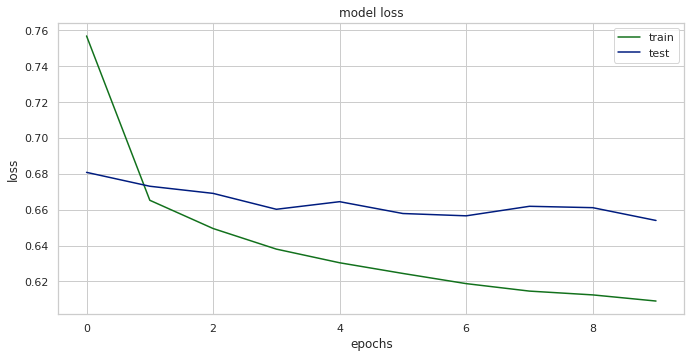

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 10 = 0.8087


In [ ]:
# Use the pre-trained model
model = matrix_factorisation_model_with_n_latent_factors(n_latent_factors, optimizer)
# Load weights
model.load_weights('bestweights.h5')

# Function to predict the ratings given User ID and Movie ID
def predict_rating(user_id, movie_id):
  return model.predict([np.array([user_id]), np.array([movie_id])])[0][0]

user_ratings = combine_movie_rating1[combine_movie_rating1['userId'] == TESTUSER][['userId', 'movieId', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(TESTUSER, x['movieId']), axis=1)
user_ratings.sort_values(by='rating', 
                         ascending=False).merge(movie_df,
                                                 on='movieId',
                                                 how='inner',
                                                 suffixes=['_u', '_m']).head(20)

1/1 [==============================] - 0s 21ms/step


,userId,movieId,rating,prediction,title,genres
0,200,2937,5.0,2.794258,"Palm Beach Story, The (1942)",Comedy
1,200,3820,5.0,-0.022737,Thomas and the Magic Railroad (2000),Children
2,200,2162,5.0,3.200773,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy
3,200,2331,5.0,3.728486,Living Out Loud (1998),Comedy|Drama|Romance
4,200,2057,5.0,3.287210,"Incredible Journey, The (1963)",Adventure|Children
5,200,2803,5.0,3.314437,"Pelican Brief, The (1993)",Crime|Drama|Mystery|Romance|Thriller
6,200,3771,5.0,3.422346,The Golden Voyage of Sinbad (1973),Action|Adventure|Fantasy
7,200,885,5.0,3.245514,Bogus (1996),Children|Drama|Fantasy
8,200,861,5.0,3.329178,Supercop (Police Story 3: Supercop) (Jing cha ...,Action|Comedy|Crime|Thriller
9,200,3635,5.0,3.735999,"Spy Who Loved Me, The (1977)",Action|Adventure|Thriller


In [ ]:
recommendations = combine_movie_rating1[combine_movie_rating1['movieId'].isin(user_ratings['movieId']) == False][['movieId']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(TESTUSER, x['movieId']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(movie_df,
                                                 on='movieId',
                                                 how='inner',
                                                 suffixes=['_u', '_m']).head(20)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 32ms/step


,movieId,prediction,title,genres
0,1245,4.753687,Miller's Crossing (1990),Crime|Drama|Film-Noir|Thriller
1,3740,4.683711,Big Trouble in Little China (1986),Action|Adventure|Comedy|Fantasy
2,1871,4.527027,"Friend of the Deceased, A (Priyatel pokonika) ...",Comedy|Drama
3,2323,4.461954,"Cruise, The (1998)",Documentary
4,8542,4.452998,"Day at the Races, A (1937)",Comedy|Musical
5,4533,4.448609,"Return of the Living Dead, The (1985)",Comedy|Horror|Sci-Fi
6,6059,4.425777,"Recruit, The (2003)",Action|Thriller
7,1415,4.394401,"Thieves (Voleurs, Les) (1996)",Crime|Drama|Romance
8,8634,4.394389,Tank (1984),Action|Comedy|Drama
9,5446,4.393260,Rabbit-Proof Fence (2002),Adventure|Drama
